In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sb

In [5]:
datapurchase = pd.read_csv('QVI_purchase_behaviour.csv')

In [6]:
datapurchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
datatransaction = pd.read_excel('QVI_transaction_data.xlsx')

In [8]:
datatransaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
datapurchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [10]:
datatransaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [11]:
datapurchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [12]:
datatransaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [13]:
data = pd.merge(datatransaction, datapurchase, on = "LYLTY_CARD_NBR", how = 'left')

In [14]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [15]:
data = data.rename(columns = {"LYLTY_CARD_NBR": "Card Number",
                             "LIFESTAGE" : "Group",
                             "PREMIUM_CUSTOMER" : "Subscription" ,
                             "DATE" : "Date",
                             "STORE_NBR" : "Store ID",
                             "TXN_ID" : "Transaction ID",
                             "PROD_NBR" : "Product ID",
                             "PROD_NAME" :"Product",
                             "PROD_QTY" : "Quantity",
                             "TOT_SALES" : "Sales"})

In [16]:
data.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [17]:
data.dtypes

Date                int64
Store ID            int64
Card Number         int64
Transaction ID      int64
Product ID          int64
Product            object
Quantity            int64
Sales             float64
Group              object
Subscription       object
dtype: object

In [18]:
date_offsets = data["Date"].to_list()
base_date = pd.Timestamp("1899-12-30")
data["Date"] = [base_date + pd.DateOffset(date_offset) for date_offset in date_offsets]
data["Date"][0:5]

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: Date, dtype: datetime64[ns]

In [19]:
data["Product"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [20]:
split_products = data["Product"].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^\w]", " ").str.split()
split_products

<ipython-input-20-35fa78bff1af>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  split_products = data["Product"].str.replace(r"([0-9]+[gG])", "").str.replace(r"[^\w]", " ").str.split()


0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: Product, Length: 264836, dtype: object

In [21]:
#To know freequency of products
word_counts= {}
def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
split_products.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [22]:
data =data[data["Product"].str.contains(r"[Ss]alsa")]
data.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,MIDAGE SINGLES/COUPLES,Budget
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6,MIDAGE SINGLES/COUPLES,Budget
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6,MIDAGE SINGLES/COUPLES,Budget


In [23]:
data.describe()

,Store ID,Card Number,Transaction ID,Product ID,Quantity,Sales
count,18094.000000,1.809400e+04,18094.000000,18094.000000,18094.000000,18094.000000
mean,135.475738,1.358016e+05,135529.391566,59.738256,1.897038,7.070703
std,76.745431,7.871344e+04,77933.610308,16.697553,0.355856,3.146715
min,1.000000,1.010000e+03,11.000000,35.000000,1.000000,1.500000
25%,70.000000,7.008750e+04,67998.000000,57.000000,2.000000,5.100000
50%,130.000000,1.301610e+05,134330.500000,59.000000,2.000000,5.400000
75%,203.000000,2.033270e+05,203629.000000,65.000000,2.000000,10.200000
max,272.000000,2.370961e+06,270174.000000,101.000000,5.000000,25.500000


In [24]:
#outliers
data.sort_values(by = "Quantity", ascending = False).head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription
185283,2019-05-20,162,162200,163005,64,Red Rock Deli SR Salsa & Mzzrlla 150g,5,13.5,YOUNG FAMILIES,Budget
55676,2018-08-18,257,257112,256419,101,Doritos Salsa Medium 300g,5,13.0,OLDER FAMILIES,Mainstream
32796,2019-05-18,236,236033,238735,59,Old El Paso Salsa Dip Tomato Med 300g,5,25.5,OLDER FAMILIES,Budget
32844,2018-08-17,257,257118,256466,65,Old El Paso Salsa Dip Chnky Tom Ht300g,5,25.5,OLDER FAMILIES,Budget
171937,2019-05-16,86,86240,85616,35,Woolworths Mild Salsa 300g,5,7.5,RETIREES,Premium


In [25]:
len(data[data["Card Number"] == 226000])

0

In [26]:
data= data[data["Quantity"]<6]          #removing outliners
data.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,MIDAGE SINGLES/COUPLES,Budget
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6,MIDAGE SINGLES/COUPLES,Budget
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6,MIDAGE SINGLES/COUPLES,Budget


In [27]:
trans_by_date = data["Date"].value_counts()     # to know the number of transactions by date
trans_by_date

2018-12-22    75
2018-07-19    74
2018-12-24    74
2018-11-30    71
2019-02-03    68
              ..
2019-06-21    37
2018-08-27    35
2019-01-03    35
2018-07-13    33
2018-12-07    33
Name: Date, Length: 364, dtype: int64

In [29]:
data["Date"].describe()       # to check if transactional date is missing

<ipython-input-29-1923b54d6092>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data["Date"].describe()       # to check if transactional date is missing


count                   18094
unique                    364
top       2018-12-22 00:00:00
freq                       75
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: Date, dtype: object

In [31]:
#Date is supposed to have 365 but it has 364
pd.date_range(start = data["Date"].min(), end = data["Date"].max()).difference(data["Date"])


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [33]:
#inserting missing value
merge_value = pd.merge(pd.Series(pd.date_range(start = data["Date"].min(), end = data["Date"].max()),name = "Date"),data, on = "Date", how = "left")
merge_value.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription
0,2018-07-01,78.0,78009.0,75510.0,35.0,Woolworths Mild Salsa 300g,2.0,3.0,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,128.0,128169.0,131648.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,2.0,10.2,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,59.0,59053.0,54823.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,2.0,10.2,MIDAGE SINGLES/COUPLES,Mainstream
3,2018-07-01,213.0,213065.0,212270.0,57.0,Old El Paso Salsa Dip Tomato Mild 300g,2.0,10.2,MIDAGE SINGLES/COUPLES,Mainstream
4,2018-07-01,37.0,37132.0,33645.0,59.0,Old El Paso Salsa Dip Tomato Med 300g,2.0,10.2,MIDAGE SINGLES/COUPLES,Premium


<ipython-input-35-dd1a1f7c5612>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  all_time = trans_by_date[(trans_by_date.index >= pd.datetime(2018,7,1)) & (trans_by_date.index < pd.datetime(2019,6,30))].sort_index()


AttributeError: 'AxesSubplot' object has no attribute 'set_xtickslabels'

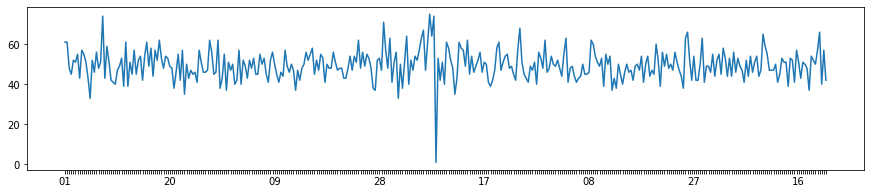

In [35]:
trans_by_date = merge_value["Date"].value_counts()
all_time = trans_by_date[(trans_by_date.index >= pd.datetime(2018,7,1)) & (trans_by_date.index < pd.datetime(2019,6,30))].sort_index()
all_time.index = all_time.index.strftime('%d')
ax = all_time.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(all_time)))
ax.set_xtickslabels(all_time.index)
plt.title("All Time Sales")
plt.savefig("All Time Sales.png", bbox_inches="tight")
plt.show()

<ipython-input-36-fedd9fb95792>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


AttributeError: 'AxesSubplot' object has no attribute 'set_xtickscks'

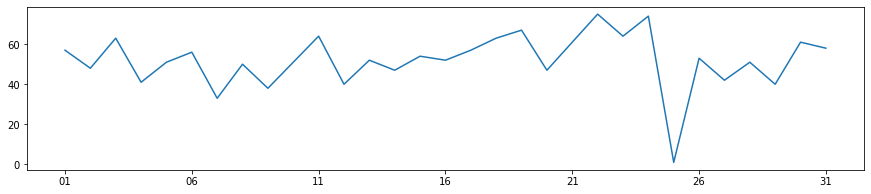

In [36]:
#december sales graph
trans_by_date = merge_value["Date"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime("%d")
ax = dec.plot(figsize=(15,3))
ax.set_xtickscks(np.arrange(len(dec)))
ax.set_xticklabelsc(dec.index)
plt.title("December Sales")
plt.savefig("December sales.png", bbox_inches="tight")
plt.show()

In [38]:
#explore product pack size
data["Product"] = data["Product"].str.replace(r"[0-9]+(G)", "g")
pack_size = data["Product"].str.extract(r"([0-9]+[gG])")[0].str.replace("g", "").astype("float")
pack_size[0:4]

<ipython-input-38-a76566f4c22e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Product"] = data["Product"].str.replace(r"[0-9]+(G)", "g")


5     300.0
25    300.0
32    150.0
44    150.0
Name: 0, dtype: float64

In [39]:
pack_size.describe()

count    18094.000000
mean       275.726760
std         55.244588
min        150.000000
25%        300.000000
50%        300.000000
75%        300.000000
max        300.000000
Name: 0, dtype: float64

NameError: name 'plt' is not defined

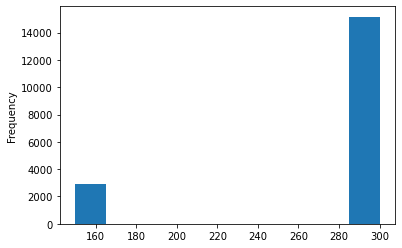

In [40]:
pack_size.plot.hist()
plt.show()

In [41]:
data["Product"].str.split().str[0].value_counts()

Old           9324
Woolworths    2921
Doritos       2921
Smiths        1470
Red           1458
Name: Product, dtype: int64

In [42]:
data["Brand"] = data["Product"].str.split().str[0]
data.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription,Brand
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,MIDAGE SINGLES/COUPLES,Budget,Red
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Smiths
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Doritos


In [45]:
#combine same brands
def clean_brand_names(line):
    brand = line["Brand"]
    if brand == "Old":
        return "Old"
    elif brand == "Woolworths":
        return "Woolworths"
    elif brand == "Doritos":
        return "Doritos"
    elif brand == "Smiths":
        return "Smiths"
    elif brand == "Red":
        return "Red"
    else:
        return brand

In [47]:
#cleansed transactional data
data["Brand"] = data.apply(lambda line: clean_brand_names(line), axis=1)
data.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription,Brand
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,MIDAGE SINGLES/COUPLES,Budget,Red
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Smiths
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Doritos


NameError: name 'plt' is not defined

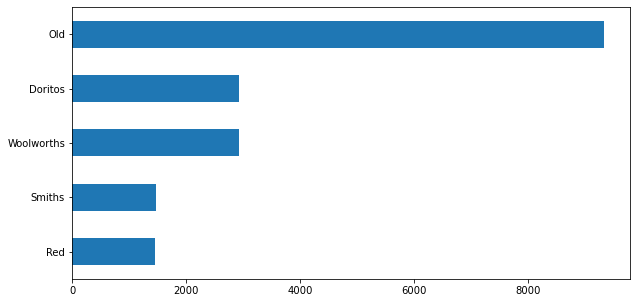

In [49]:
#Hologram of freequency
data["Brand"].value_counts(ascending = True).plot.barh(figsize = (10,5))
plt.show()

In [50]:
#Group that spends most on chips
most_shopping = data.groupby(["Group", "Subscription"])["Sales"].agg(["sum"]).sort_values(ascending = False, by = "sum")
most_shopping

sum
Group                  Subscription         
OLDER FAMILIES         Budget        11499.5
RETIREES               Mainstream    10508.1
YOUNG SINGLES/COUPLES  Mainstream    10039.4
YOUNG FAMILIES         Budget         9627.9
OLDER SINGLES/COUPLES  Budget         8936.2
                       Mainstream     8745.3
                       Premium        8725.6
RETIREES               Budget         7231.5
OLDER FAMILIES         Mainstream     7032.0
YOUNG FAMILIES         Mainstream     6450.5
RETIREES               Premium        6349.4
MIDAGE SINGLES/COUPLES Mainstream     6069.6
YOUNG FAMILIES         Premium        5453.8
OLDER FAMILIES         Premium        5415.8
YOUNG SINGLES/COUPLES  Budget         4019.5
MIDAGE SINGLES/COUPLES Premium        3988.8
YOUNG SINGLES/COUPLES  Premium        2589.8
MIDAGE SINGLES/COUPLES Budget         2169.1
NEW FAMILIES           Budget         1321.0
                       Mainstream     1034.2
                       Premium         730.3

NameError: name 'plt' is not defined

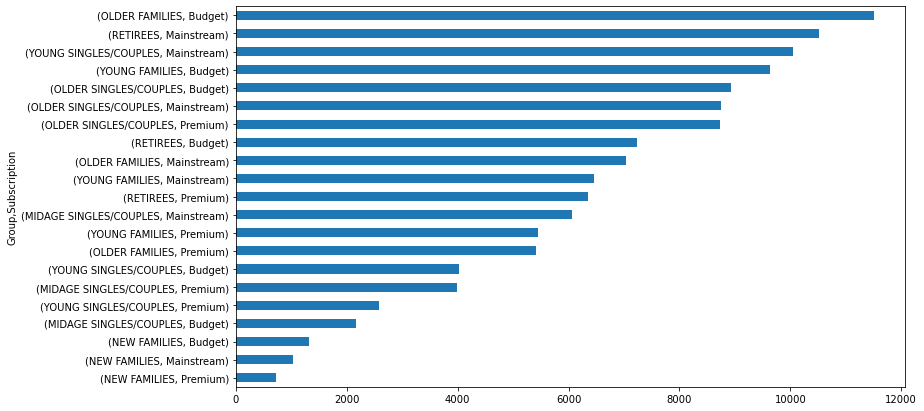

In [51]:
#Hologram of customer segments
most_shopping["sum"].sort_values().plot.barh(figsize = (12,7))
plt.show()

In [53]:
#top shopping per group by subscription
stage_agg_prem = data.groupby("Group")["Subscription"].agg(pd.Series.mode).sort_values()
print("Top contributor per Group by Subscription")
print(stage_agg_prem)

Top contributor per Group by Subscription
Group
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
OLDER SINGLES/COUPLES     Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: Subscription, dtype: object


In [54]:
#Number of customers in each segment
cust_seg = data.groupby(["Group", "Subscription"])["Card Number"].nunique().sort_values(ascending = False)
pd.DataFrame(cust_seg)

Card Number
Group                  Subscription             
OLDER FAMILIES         Budget               1320
RETIREES               Mainstream           1308
YOUNG SINGLES/COUPLES  Mainstream           1186
YOUNG FAMILIES         Budget               1113
OLDER SINGLES/COUPLES  Mainstream           1080
                       Budget               1063
                       Premium              1026
RETIREES               Budget                874
OLDER FAMILIES         Mainstream            816
YOUNG FAMILIES         Mainstream            764
RETIREES               Premium               750
MIDAGE SINGLES/COUPLES Mainstream            679
YOUNG FAMILIES         Premium               625
YOUNG SINGLES/COUPLES  Budget                619
OLDER FAMILIES         Premium               609
MIDAGE SINGLES/COUPLES Premium               513
YOUNG SINGLES/COUPLES  Premium               391
MIDAGE SINGLES/COUPLES Budget                282
NEW FAMILIES           Budget                169
                       Mainstream            129
                       Premium                93

NameError: name 'plt' is not defined

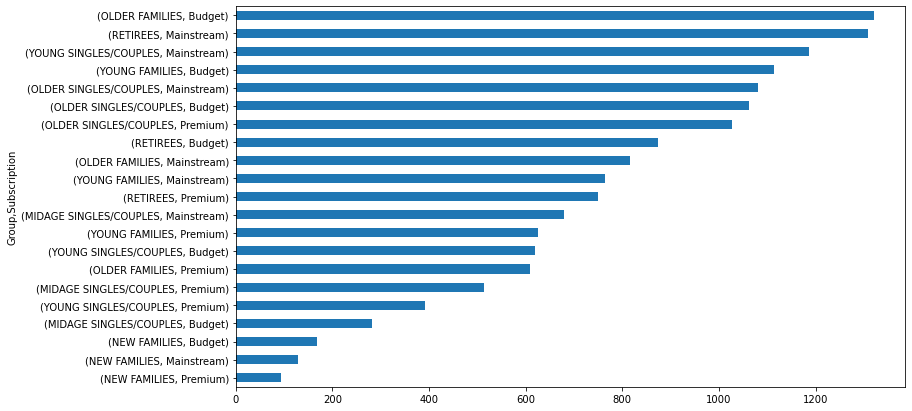

In [55]:
#customer segments freequency
cust_seg.sort_values().plot.barh(figsize = (12,7))
plt.show()

In [56]:
#Number of chips bought per customer
chips_shop_per_segment = data.groupby(["Card Number", "Group", "Subscription"]).count()["Date"]
chips_shop_per_segment.to_frame()

,,,Date
Card Number,Group,Subscription,
1010,YOUNG SINGLES/COUPLES,Mainstream,1
1011,OLDER SINGLES/COUPLES,Mainstream,1
1028,YOUNG SINGLES/COUPLES,Budget,1
1057,MIDAGE SINGLES/COUPLES,Mainstream,1
1065,MIDAGE SINGLES/COUPLES,Premium,1
...,...,...,...
272364,YOUNG FAMILIES,Mainstream,1
272366,OLDER SINGLES/COUPLES,Budget,1
272369,RETIREES,Budget,1


In [60]:
#chips from groups by individual (avg)
segment_shop_chips = chips_shop_per_segment.groupby(["Group", "Subscription"]).agg(["mean"]).sort_values(ascending = False, by = "mean")
segment_shop_chips

mean
Group                  Subscription          
OLDER FAMILIES         Premium       1.292282
YOUNG FAMILIES         Mainstream    1.256545
OLDER FAMILIES         Budget        1.246970
YOUNG FAMILIES         Premium       1.246400
OLDER FAMILIES         Mainstream    1.229167
YOUNG FAMILIES         Budget        1.221024
MIDAGE SINGLES/COUPLES Premium       1.177388
                       Budget        1.166667
OLDER SINGLES/COUPLES  Mainstream    1.163889
                       Premium       1.163743
                       Budget        1.161806
MIDAGE SINGLES/COUPLES Mainstream    1.147275
RETIREES               Premium       1.146667
                       Mainstream    1.143731
                       Budget        1.116705
YOUNG SINGLES/COUPLES  Mainstream    1.104553
                       Premium       1.097187
NEW FAMILIES           Premium       1.086022
                       Mainstream    1.085271
YOUNG SINGLES/COUPLES  Budget        1.080775
NEW FAMILIES           Budget        1.071006

NameError: name 'plt' is not defined

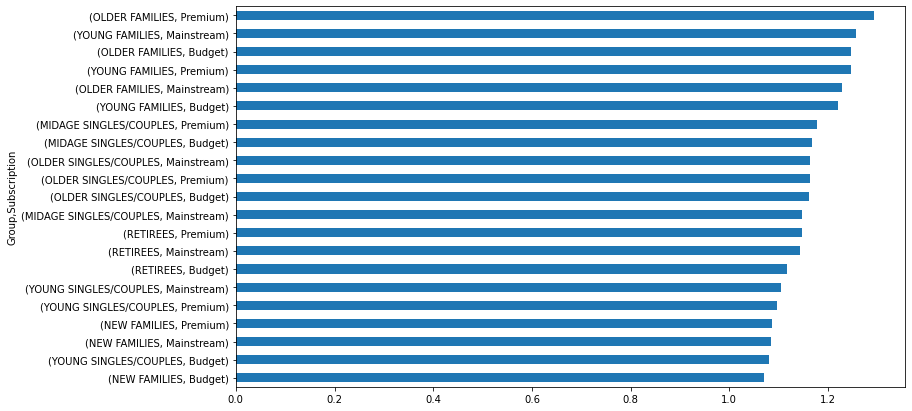

In [61]:
#Histogram of shopping by segment
segment_shop_chips["mean"].sort_values().plot.barh(figsize = (12,7))
plt.show()

In [62]:
#average chip price by customer segment
avg_chips_price_cust_segment = data.groupby(["Group", "Subscription"])["Sales"].agg(["mean"]).sort_values(ascending = False, by = "mean")
avg_chips_price_cust_segment

,,mean
Group,Subscription,
MIDAGE SINGLES/COUPLES,Mainstream,7.791528
YOUNG SINGLES/COUPLES,Mainstream,7.663664
RETIREES,Budget,7.409324
NEW FAMILIES,Mainstream,7.387143
RETIREES,Premium,7.383023
OLDER SINGLES/COUPLES,Premium,7.307873
NEW FAMILIES,Budget,7.298343
OLDER SINGLES/COUPLES,Budget,7.235789
NEW FAMILIES,Premium,7.230693


<AxesSubplot:ylabel='Group,Subscription'>

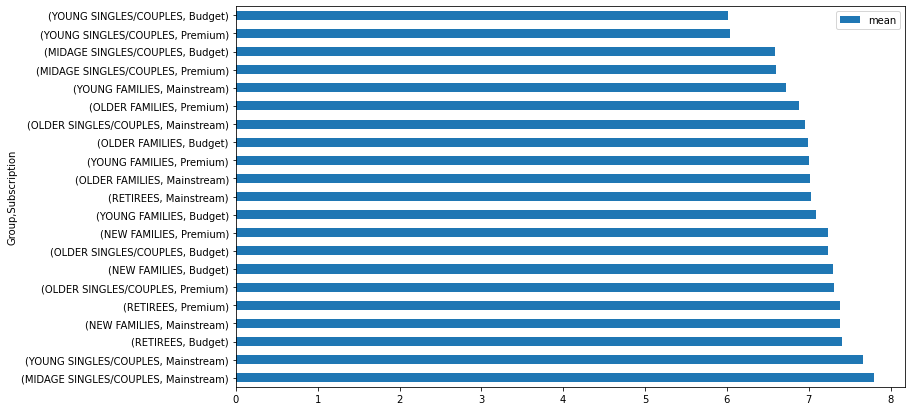

In [63]:
#histogram of average chip price
avg_chips_price_cust_segment.plot.barh(figsize = (12,7))

In [72]:
#T-Test
import scipy.stats as stats
mainstream = data["Subscription"] == "Mainstream"
budget_premium = (data["Subscription"] == "Budget") |(data["Subscription"] == "Premium")
young_midage = (data["Group"] == "MIDAGE SINGLES/COUPLES")|(data["Group"] == "YOUNG SINGLES/COUPLES")

a=data[young_midage & mainstream]["Sales"]
b=data[young_midage & budget_premium]["Sales"]

stat, pval=stats.ttest_ind(a.values, b.values, equal_var = False)
print(pval)
pval < 0.0000001

1.4632059977431753e-47


True

In [73]:
# what brand of chips the top 3 segments contributing to total sales are buying
data.groupby(["Group", "Subscription"])["Brand"].agg(pd.Series.mode).sort_values().to_frame()

Brand
Group                  Subscription      
MIDAGE SINGLES/COUPLES Budget         Old
YOUNG SINGLES/COUPLES  Budget         Old
YOUNG FAMILIES         Premium        Old
                       Mainstream     Old
                       Budget         Old
RETIREES               Premium        Old
                       Mainstream     Old
                       Budget         Old
OLDER SINGLES/COUPLES  Premium        Old
YOUNG SINGLES/COUPLES  Mainstream     Old
OLDER SINGLES/COUPLES  Mainstream     Old
OLDER FAMILIES         Premium        Old
                       Mainstream     Old
                       Budget         Old
NEW FAMILIES           Premium        Old
                       Mainstream     Old
                       Budget         Old
MIDAGE SINGLES/COUPLES Premium        Old
                       Mainstream     Old
OLDER SINGLES/COUPLES  Budget         Old
YOUNG SINGLES/COUPLES  Premium        Old

============ MIDAGE SINGLES/COUPLES - Budget ===========
Old           144
Woolworths     56
Doritos        54
Name: Brand, dtype: int64


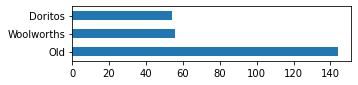

============ MIDAGE SINGLES/COUPLES - Mainstream ===========
Old           501
Woolworths     92
Doritos        81
Name: Brand, dtype: int64


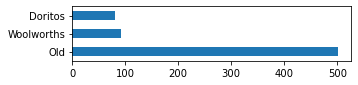

============ MIDAGE SINGLES/COUPLES - Premium ===========
Old           270
Woolworths    109
Doritos       103
Name: Brand, dtype: int64


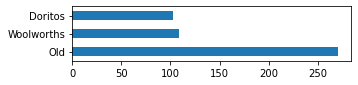

============ NEW FAMILIES - Budget ===========
Old           107
Doritos        28
Woolworths     23
Name: Brand, dtype: int64


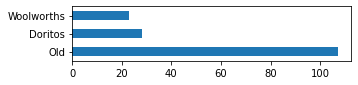

============ NEW FAMILIES - Mainstream ===========
Old           82
Woolworths    19
Doritos       17
Name: Brand, dtype: int64


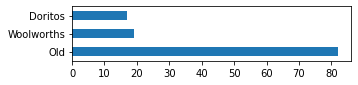

============ NEW FAMILIES - Premium ===========
Old           56
Doritos       13
Woolworths    12
Name: Brand, dtype: int64


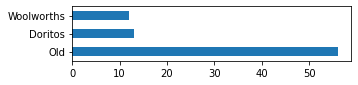

============ OLDER FAMILIES - Budget ===========
Old           758
Doritos       319
Woolworths    275
Name: Brand, dtype: int64


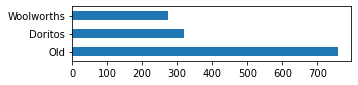

============ OLDER FAMILIES - Mainstream ===========
Old           474
Doritos       186
Woolworths    173
Name: Brand, dtype: int64


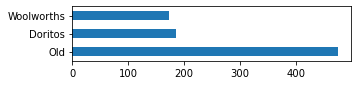

============ OLDER FAMILIES - Premium ===========
Old           357
Woolworths    145
Doritos       142
Name: Brand, dtype: int64


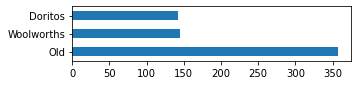

============ OLDER SINGLES/COUPLES - Budget ===========
Old           674
Doritos       203
Woolworths    185
Name: Brand, dtype: int64


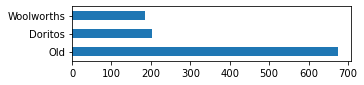

============ OLDER SINGLES/COUPLES - Mainstream ===========
Old           618
Doritos       217
Woolworths    207
Name: Brand, dtype: int64


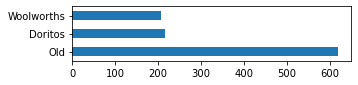

============ OLDER SINGLES/COUPLES - Premium ===========
Old           653
Woolworths    185
Doritos       174
Name: Brand, dtype: int64


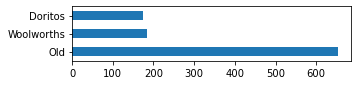

============ RETIREES - Budget ===========
Old           569
Doritos       150
Woolworths    118
Name: Brand, dtype: int64


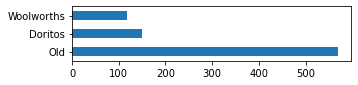

============ RETIREES - Mainstream ===========
Old           764
Woolworths    269
Doritos       231
Name: Brand, dtype: int64


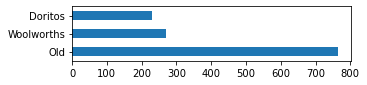

============ RETIREES - Premium ===========
Old           506
Woolworths    119
Doritos       103
Name: Brand, dtype: int64


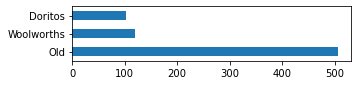

============ YOUNG FAMILIES - Budget ===========
Old           672
Doritos       229
Woolworths    226
Name: Brand, dtype: int64


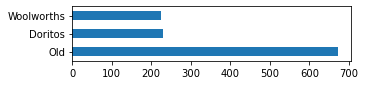

============ YOUNG FAMILIES - Mainstream ===========
Old           419
Doritos       184
Woolworths    183
Name: Brand, dtype: int64


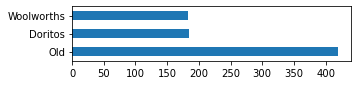

============ YOUNG FAMILIES - Premium ===========
Old           376
Woolworths    141
Doritos       127
Name: Brand, dtype: int64


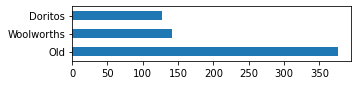

============ YOUNG SINGLES/COUPLES - Budget ===========
Old           279
Woolworths    159
Doritos       117
Name: Brand, dtype: int64


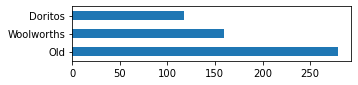

============ YOUNG SINGLES/COUPLES - Mainstream ===========
Old           867
Doritos       162
Woolworths    120
Name: Brand, dtype: int64


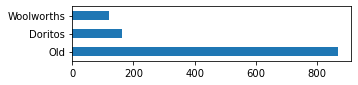

============ YOUNG SINGLES/COUPLES - Premium ===========
Old           178
Woolworths    105
Doritos        81
Name: Brand, dtype: int64


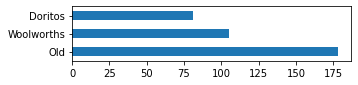

In [75]:
# chips brand old is the most purchased brand
import matplotlib.pyplot as plt
for stage in data["Group"].unique():
    for subs in data["Subscription"].unique():
        print("============", stage, "-" , subs, "===========")
        summary = data[(data["Group"] == stage) & (data["Subscription"] == subs)]["Brand"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize = (5,1))
        plt.show()

In [77]:
# know if our target segment tends to buy larger packs of chips
merged_pack = pd.concat([data, pack_size.rename("Size")], axis = 1)
merged_pack.head()

,Date,Store ID,Card Number,Transaction ID,Product ID,Product,Quantity,Sales,Group,Subscription,Brand,Size
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old,300.0
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,Old,300.0
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,MIDAGE SINGLES/COUPLES,Budget,Red,150.0
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Smiths,150.0
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6,MIDAGE SINGLES/COUPLES,Budget,Doritos,300.0


============ MIDAGE SINGLES/COUPLES - Budget ===========
Doritos        54
Old           144
Woolworths     56
Name: Brand, dtype: int64


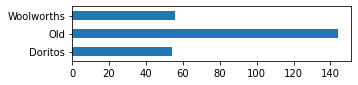

============ MIDAGE SINGLES/COUPLES - Mainstream ===========
Doritos        81
Old           501
Woolworths     92
Name: Brand, dtype: int64


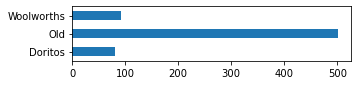

============ MIDAGE SINGLES/COUPLES - Premium ===========
Doritos       103
Old           270
Woolworths    109
Name: Brand, dtype: int64


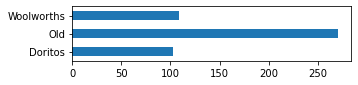

============ NEW FAMILIES - Budget ===========
Doritos        28
Old           107
Woolworths     23
Name: Brand, dtype: int64


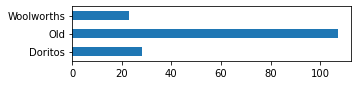

============ NEW FAMILIES - Mainstream ===========
Doritos       17
Old           82
Woolworths    19
Name: Brand, dtype: int64


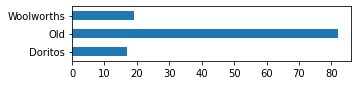

============ NEW FAMILIES - Premium ===========
Doritos       13
Old           56
Woolworths    12
Name: Brand, dtype: int64


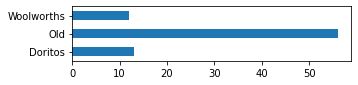

============ OLDER FAMILIES - Budget ===========
Doritos       319
Old           758
Woolworths    275
Name: Brand, dtype: int64


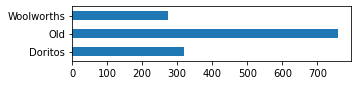

============ OLDER FAMILIES - Mainstream ===========
Doritos       186
Old           474
Woolworths    173
Name: Brand, dtype: int64


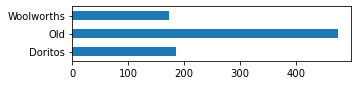

============ OLDER FAMILIES - Premium ===========
Doritos       142
Old           357
Woolworths    145
Name: Brand, dtype: int64


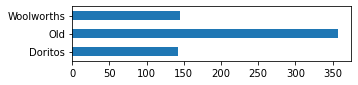

============ OLDER SINGLES/COUPLES - Budget ===========
Doritos       203
Old           674
Woolworths    185
Name: Brand, dtype: int64


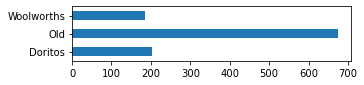

============ OLDER SINGLES/COUPLES - Mainstream ===========
Doritos       217
Old           618
Woolworths    207
Name: Brand, dtype: int64


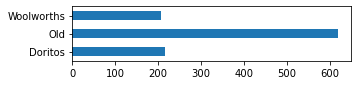

============ OLDER SINGLES/COUPLES - Premium ===========
Doritos       174
Old           653
Woolworths    185
Name: Brand, dtype: int64


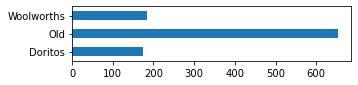

============ RETIREES - Budget ===========
Doritos       150
Old           569
Woolworths    118
Name: Brand, dtype: int64


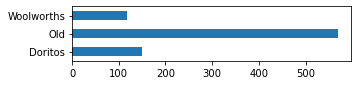

============ RETIREES - Mainstream ===========
Doritos       231
Old           764
Woolworths    269
Name: Brand, dtype: int64


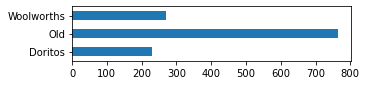

============ RETIREES - Premium ===========
Doritos       103
Old           506
Woolworths    119
Name: Brand, dtype: int64


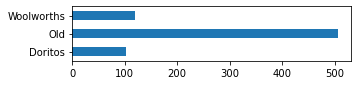

============ YOUNG FAMILIES - Budget ===========
Doritos       229
Old           672
Woolworths    226
Name: Brand, dtype: int64


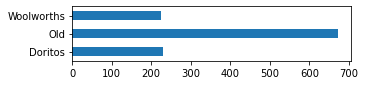

============ YOUNG FAMILIES - Mainstream ===========
Doritos       184
Old           419
Woolworths    183
Name: Brand, dtype: int64


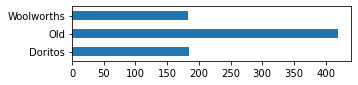

============ YOUNG FAMILIES - Premium ===========
Doritos       127
Old           376
Woolworths    141
Name: Brand, dtype: int64


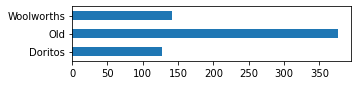

============ YOUNG SINGLES/COUPLES - Budget ===========
Doritos       117
Old           279
Woolworths    159
Name: Brand, dtype: int64


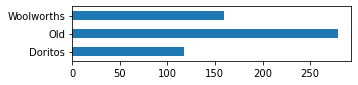

============ YOUNG SINGLES/COUPLES - Mainstream ===========
Doritos       162
Old           867
Woolworths    120
Name: Brand, dtype: int64


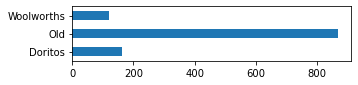

============ YOUNG SINGLES/COUPLES - Premium ===========
Doritos        81
Old           178
Woolworths    105
Name: Brand, dtype: int64


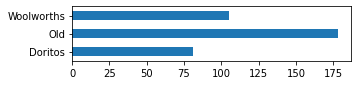

In [78]:
for stage in data["Group"].unique():
    for subs in data["Subscription"].unique():
        print("============", stage, "-" , subs, "===========")
        summary = merged_pack[(merged_pack["Group"] == stage) & (merged_pack["Subscription"] == subs)]["Brand"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize = (5,1))
        plt.show()

In [80]:
#average amount of chips per customer
avg_chips = (data.groupby(["Group", "Subscription"])["Quantity"].sum()/data.groupby(["Group", "Subscription"])["Card Number"].nunique()).sort_values(ascending = False).to_frame()
avg_chips

0
Group                  Subscription          
OLDER FAMILIES         Premium       2.515599
                       Budget        2.433333
YOUNG FAMILIES         Mainstream    2.421466
                       Premium       2.408000
OLDER FAMILIES         Mainstream    2.392157
YOUNG FAMILIES         Budget        2.362084
OLDER SINGLES/COUPLES  Premium       2.232943
                       Mainstream    2.212963
                       Budget        2.198495
MIDAGE SINGLES/COUPLES Premium       2.194932
                       Mainstream    2.188513
                       Budget        2.173759
RETIREES               Mainstream    2.172018
                       Premium       2.157333
                       Budget        2.096110
YOUNG SINGLES/COUPLES  Mainstream    2.029511
NEW FAMILIES           Premium       2.021505
                       Mainstream    2.007752
                       Budget        1.952663
YOUNG SINGLES/COUPLES  Premium       1.933504
                       Budget        1.891761

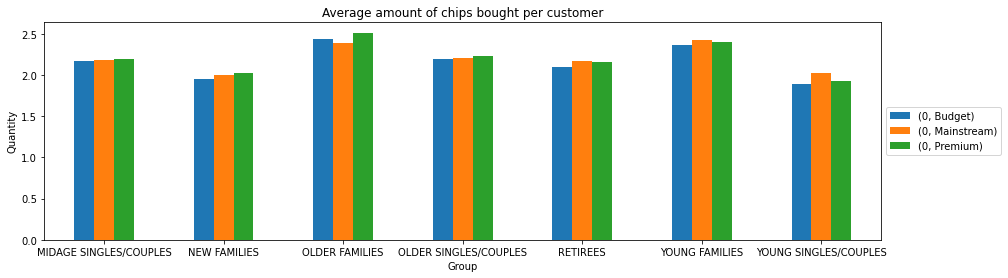

In [82]:
#Histogram
avg_chips.unstack().plot.bar(figsize =(15,4), rot = 0)
plt.title("Average amount of chips bought per customer")
plt.legend(loc="center left", bbox_to_anchor=(1.0,0.5))
plt.ylabel("Quantity")
plt.show()

In [83]:
data["Unit Price"] = data["Sales"] / data["Quantity"]
chips_segment = data.groupby(["Group","Subscription"]).mean()["Unit Price"].sort_values(ascending =False).to_frame()
chips_segment

Unit Price
Group                  Subscription            
YOUNG SINGLES/COUPLES  Mainstream      4.158656
MIDAGE SINGLES/COUPLES Mainstream      4.083569
NEW FAMILIES           Budget          3.943646
RETIREES               Budget          3.931865
                       Premium         3.926744
NEW FAMILIES           Mainstream      3.923571
                       Premium         3.866337
OLDER SINGLES/COUPLES  Budget          3.806478
                       Premium         3.804523
RETIREES               Mainstream      3.687166
YOUNG FAMILIES         Budget          3.661148
OLDER SINGLES/COUPLES  Mainstream      3.656325
YOUNG FAMILIES         Premium         3.617458
OLDER FAMILIES         Mainstream      3.599402
                       Budget          3.576549
                       Premium         3.541042
MIDAGE SINGLES/COUPLES Premium         3.528808
                       Budget          3.517021
YOUNG FAMILIES         Mainstream      3.490104
YOUNG SINGLES/COUPLES  Budget          3.385426
                       Premium         3.374126

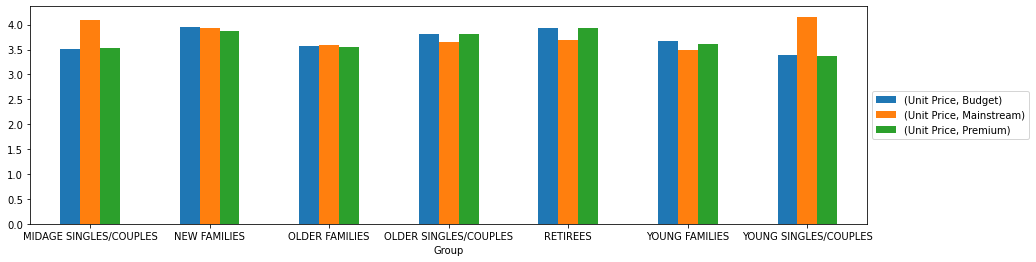

In [84]:
chips_segment.unstack().plot.bar(figsize =(15,4), rot = 0)
plt.legend(loc="center left", bbox_to_anchor=(1.0,0.5))
plt.show()